In [32]:
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver

options = Options()
#options.headless = True
service = Service(executable_path="chromedriver")
b = webdriver.Chrome(options=options, service=service)

In [14]:
import time
url = "https://tyler.caraza-harter.com/cs320/tricky/page1.html"
b.get(url)

# POLLING: keep checking regularly until something is ready
for i in range(30):
    tbls = b.find_elements("tag name", "table")
    print("Tables:", len(tbls))
    if len(tbls) == 2:
        break
    time.sleep(0.1)
assert len(tbls) == 2 # did we timeout?


Tables: 1
Tables: 1
Tables: 1
Tables: 1
Tables: 1
Tables: 1
Tables: 1
Tables: 1
Tables: 1
Tables: 1
Tables: 2


In [17]:
tbls[-1]

<selenium.webdriver.remote.webelement.WebElement (session="e8595abad5391f42a795aa0309a838ab", element="cd2d622b-f762-41ee-9fa6-c2403f3d9368")>

In [20]:
len(b.find_elements("tag name", "tr"))

14

In [21]:
len(tbls[-1].find_elements("tag name", "tr"))

11

In [28]:
rows = [] # a list of rows

trs = tbls[-1].find_elements("tag name", "tr")
for tr in trs:
    tds = tr.find_elements("tag name", "td")
    assert len(tds) == 2
    rows.append([tds[0].text, tds[1].text])
rows

[['x', 'y'],
 ['0', '1'],
 ['2', '3'],
 ['4', '5'],
 ['6', '7'],
 ['8', '9'],
 ['10', '11'],
 ['12', '13'],
 ['14', '15'],
 ['16', '17'],
 ['18', '19']]

In [31]:
import pandas as pd
pd.DataFrame(rows[1:], columns=rows[0])

,x,y
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9
5,10,11
6,12,13
7,14,15
8,16,17
9,18,19


In [33]:
url = "https://tyler.caraza-harter.com/cs320/tricky/page2.html"
b.get(url)

In [40]:
while True:
    try:
        btn = b.find_element("id", "more")
        btn.click()
    except NoSuchElementException:
        print("exception!  button is gone")
        break
    time.sleep(1)

exception!  button is gone


In [41]:
print(b.page_source)

<html><head>
    <script src="https://code.jquery.com/jquery-3.4.1.js"></script>
    <script>
      var lines = [];

      function show() {
        tbl = document.getElementById("hurricanes");
        count = Math.min(10, lines.length);
        for (i=0; i<count; i++) {
          var tr = document.createElement("tr");
          tr.innerHTML = "<td>"+lines[i].replace(/,/g, "</td><td>")+"</td>";
          tbl.appendChild(tr);
        }
        lines = lines.slice(count);
        if (lines.length == 0) {
          document.getElementById("more").remove();
        }
      }

      function main() {
        fetch('hurricanes.csv')
          .then(response => response.text())
          .then(data => {
            console.log(data);
            lines = data.split("\n");
            show();
          })
      }
      </script>
  </head>
  <body onload="main()">
    <h1>Keep clicking...</h1>

    <table id="hurricanes" border="1"><tr><td>name</td><td>formed</td><td>dissipated</td><td>mph</td><

# Example: password protected page

In [42]:

url = "https://tyler.caraza-harter.com/cs320/tricky/page3.html"
b.get(url)

In [45]:

text = b.find_element("id", "password")
btn = b.find_element("id", "login_btn")
text.send_keys("fido")

In [46]:
btn.click()

In [47]:
print(b.page_source)

<html><head>
    <script src="https://code.jquery.com/jquery-3.4.1.js"></script>
    <script>
      var lines = [];

      function login() {
        if (document.getElementById("password").value != "fido") {
          alert("sorry, password != 'fido'")
          return;
        }

        fetch('hurricanes.csv')
          .then(response => response.text())
          .then(data => {
            console.log(data);
            lines = data.split("\n");
            show();
          })
        }

      function show() {
        tbl = document.getElementById("hurricanes");
        tbl.innerHTML = "";
        for (i=0; i<lines.length; i++) {
          var tr = document.createElement("tr");
          tr.innerHTML = "<td>"+lines[i].replace(/,/g, "</td><td>")+"</td>";
          tbl.appendChild(tr);
        }
      }
      </script>
  </head>
  <body>
    <h1>Sign In to View Table</h1>

    Password: <input id="password">
    <button id="login_btn" onclick="login()">Login</button>

    <h3>Tabl

# How many hurricanes were there each year?

In [48]:
url = "https://tyler.caraza-harter.com/cs320/tricky/page4.html"
b.get(url)

In [49]:

text = b.find_element("id", "year")
btn = b.find_element("id", "search_btn")

In [59]:

counts_per_year = pd.Series(dtype=float)

for year in range(1950, 2010):
    text.clear()
    text.send_keys(str(year))
    btn.click()
    time.sleep(0.1)
    rows = b.find_elements("tag name", "tr")
    count = len(rows) - 1    
    counts_per_year.loc[year] = count
counts_per_year

1950    3
1951    0
1952    1
1953    2
1954    2
1955    1
1956    2
1957    0
1958    1
1959    4
1960    2
1961    2
1962    1
1963    0
1964    4
1965    1
1966    2
1967    1
1968    1
1969    1
1970    1
1971    3
1972    1
1973    0
1974    1
1975    1
1976    2
1977    1
1978    0
1979    2
1980    1
1981    0
1982    1
1983    1
1984    1
1985    6
1986    1
1987    3
1988    2
1989    3
1990    1
1991    4
1992    3
1993    1
1994    0
1995    3
1996    3
1997    3
1998    3
1999    4
2000    0
2001    0
2002    3
2003    3
2004    8
2005    7
2006    0
2007    1
2008    4
2009    0
dtype: int64

Text(0, 0.5, 'Hurricane Count')

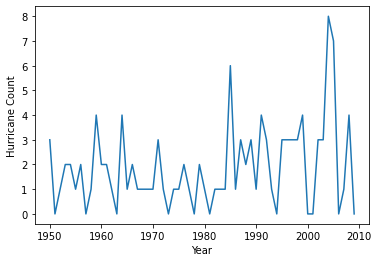

In [62]:
ax = counts_per_year.plot.line()
ax.set_xlabel("Year")
ax.set_ylabel("Hurricane Count")